In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/kaggle/GOLDdata.csv')

In [3]:
data.head()

,Date,Price,Open,High,Low
0,10/27/2023,1998.5,1995.0,2019.7,1986.4
1,10/26/2023,1997.4,1991.2,2003.7,1981.6
2,10/25/2023,1994.9,1982.7,1998.6,1973.6
3,10/24/2023,1986.1,1984.1,1992.0,1964.6
4,10/23/2023,1987.8,1987.7,1994.3,1971.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3060 non-null   object 
 1   Price   3060 non-null   float64
 2   Open    3060 non-null   float64
 3   High    3060 non-null   float64
 4   Low     3060 non-null   float64
dtypes: float64(4), object(1)
memory usage: 119.7+ KB


In [5]:
data.isnull().sum()

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [7]:
data.head()

,Date,Price,Open,High,Low
0,2023-10-27,1998.5,1995.0,2019.7,1986.4
1,2023-10-26,1997.4,1991.2,2003.7,1981.6
2,2023-10-25,1994.9,1982.7,1998.6,1973.6
3,2023-10-24,1986.1,1984.1,1992.0,1964.6
4,2023-10-23,1987.8,1987.7,1994.3,1971.0


In [8]:
data.sort_values(by='Date', inplace=True)

In [9]:
data.head()

,Date,Price,Open,High,Low
3059,2012-01-03,1600.5,1571.0,1608.7,1566.8
3058,2012-01-04,1612.7,1604.9,1619.8,1593.8
3057,2012-01-05,1620.1,1614.4,1626.8,1597.7
3056,2012-01-06,1616.8,1622.4,1632.3,1609.0
3055,2012-01-09,1608.1,1617.7,1624.6,1605.7


In [10]:
data = data.reset_index(drop=True)
data.head()

,Date,Price,Open,High,Low
0,2012-01-03,1600.5,1571.0,1608.7,1566.8
1,2012-01-04,1612.7,1604.9,1619.8,1593.8
2,2012-01-05,1620.1,1614.4,1626.8,1597.7
3,2012-01-06,1616.8,1622.4,1632.3,1609.0
4,2012-01-09,1608.1,1617.7,1624.6,1605.7


In [11]:
tables = ['Date', 'Open', 'High', 'Low']

In [12]:
X = data[tables]
y = data['Price']

<function matplotlib.pyplot.show(close=None, block=None)>

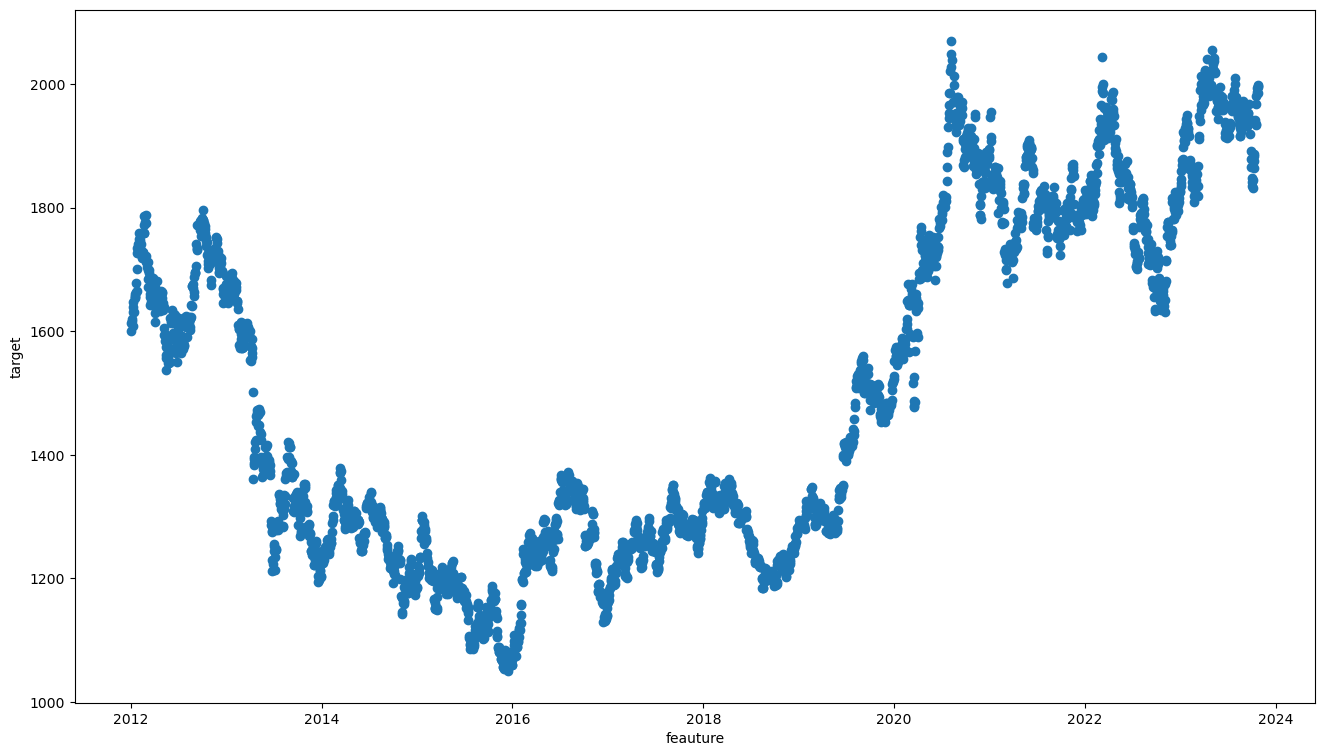

In [13]:
fig = plt.figure(figsize=(16,9))
plt.scatter(X['Date'], y)
plt.xlabel('feauture')
plt.ylabel('target')
plt.show

In [14]:
train_size = 0.8
train_index = int(len(X) * train_size)

In [15]:
X_train = X[:train_index]
X_test = X[train_index:]
y_train = y[:train_index]
y_test = y[train_index:]

In [16]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()

Обучение модели LinearRegression

In [17]:
model_linreg.fit(X_train.iloc[:,1:], y_train)

LinearRegression()

In [18]:
model_linreg.coef_, model_linreg.intercept_

(array([-0.56303099,  0.78129596,  0.78405083]), -2.7732606222493814)

Предикты

In [144]:
data_for_pred = pd.DataFrame({'Open':[1900],'High':[1920],'Low':[1880]})

In [145]:
model_linreg.predict(data_for_pred)

array([1901.57166529])

In [19]:
predict_test = model_linreg.predict(X_test.iloc[:,1:])

In [20]:
linreg_score = model_linreg.score(X_test.iloc[:,1:], y_test)

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predict_test)
rmse = np.sqrt(mse)

In [22]:
print(f'score = {linreg_score}\nMSE = {mse}\nRMSE = {rmse}')

score = 0.9953778896641583
MSE = 42.20285947617539
RMSE = 6.496372793811589


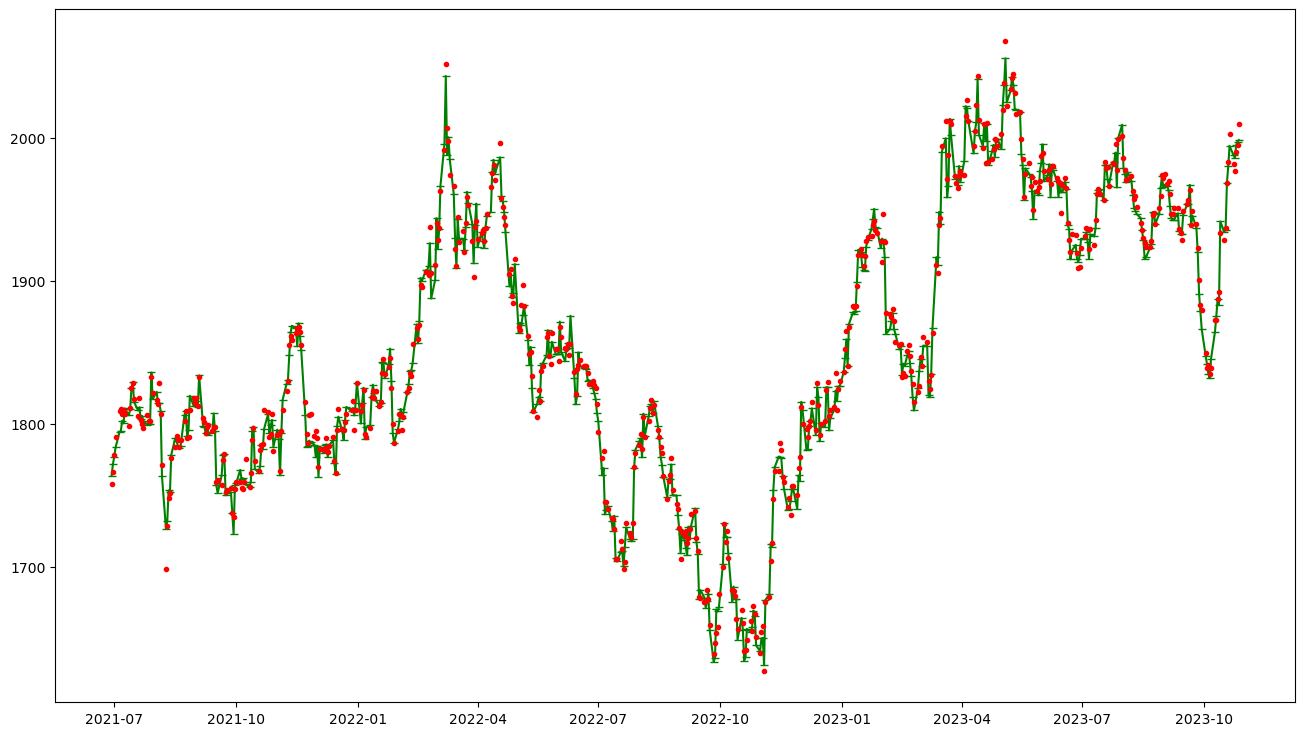

In [99]:
plt.figure(figsize=(16,9))
plt.plot(X_test['Date'],y_test, "-_g")
plt.plot(X_test['Date'],predict_test, ".r")
plt.show()

In [24]:
df = pd.DataFrame(data = {'True':predict_test,'Predicted': y_test})
df.reset_index(drop=True, inplace=True)

In [25]:
df.head()

,True,Predicted
0,1757.956347,1763.6
1,1766.386297,1771.6
2,1778.130041,1776.8
3,1790.788365,1783.3
4,1808.703439,1794.2


In [27]:
def get_word(df, table, i):
    current = round(df[table].loc[i+1]/10)
    previos= round(df[table].loc[i]/10)
    word = 'grow' if current > previos else 'stay' if current == previos else 'down'
    return word

In [91]:
words_df = pd.DataFrame(columns=['true', 'pred'])
for i in range(len(df)):
    if i == len(df)-1:
        break
    words_df.loc[i,:] = {'true': get_word(df, 'True', i), 'pred': get_word(df, 'Predicted', i)}


In [92]:
len(words_df[(words_df['true']=='down') & (words_df['pred']!='down')]) + len(words_df[(words_df['true']=='grow') & (words_df['pred']!='grow')])

125

In [93]:
print(f"критические ошибки: {len(words_df[(words_df['true']=='down') & (words_df['pred']=='grow')]) + len(words_df[(words_df['true']=='grow') & (words_df['pred']=='down')])}")

критические ошибки: 17
